In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from plotnine import ggplot, aes, geom_bar, geom_line, facet_wrap, theme_minimal, labs

In [4]:
df = pd.read_csv('../benchmark/results_tree.csv')

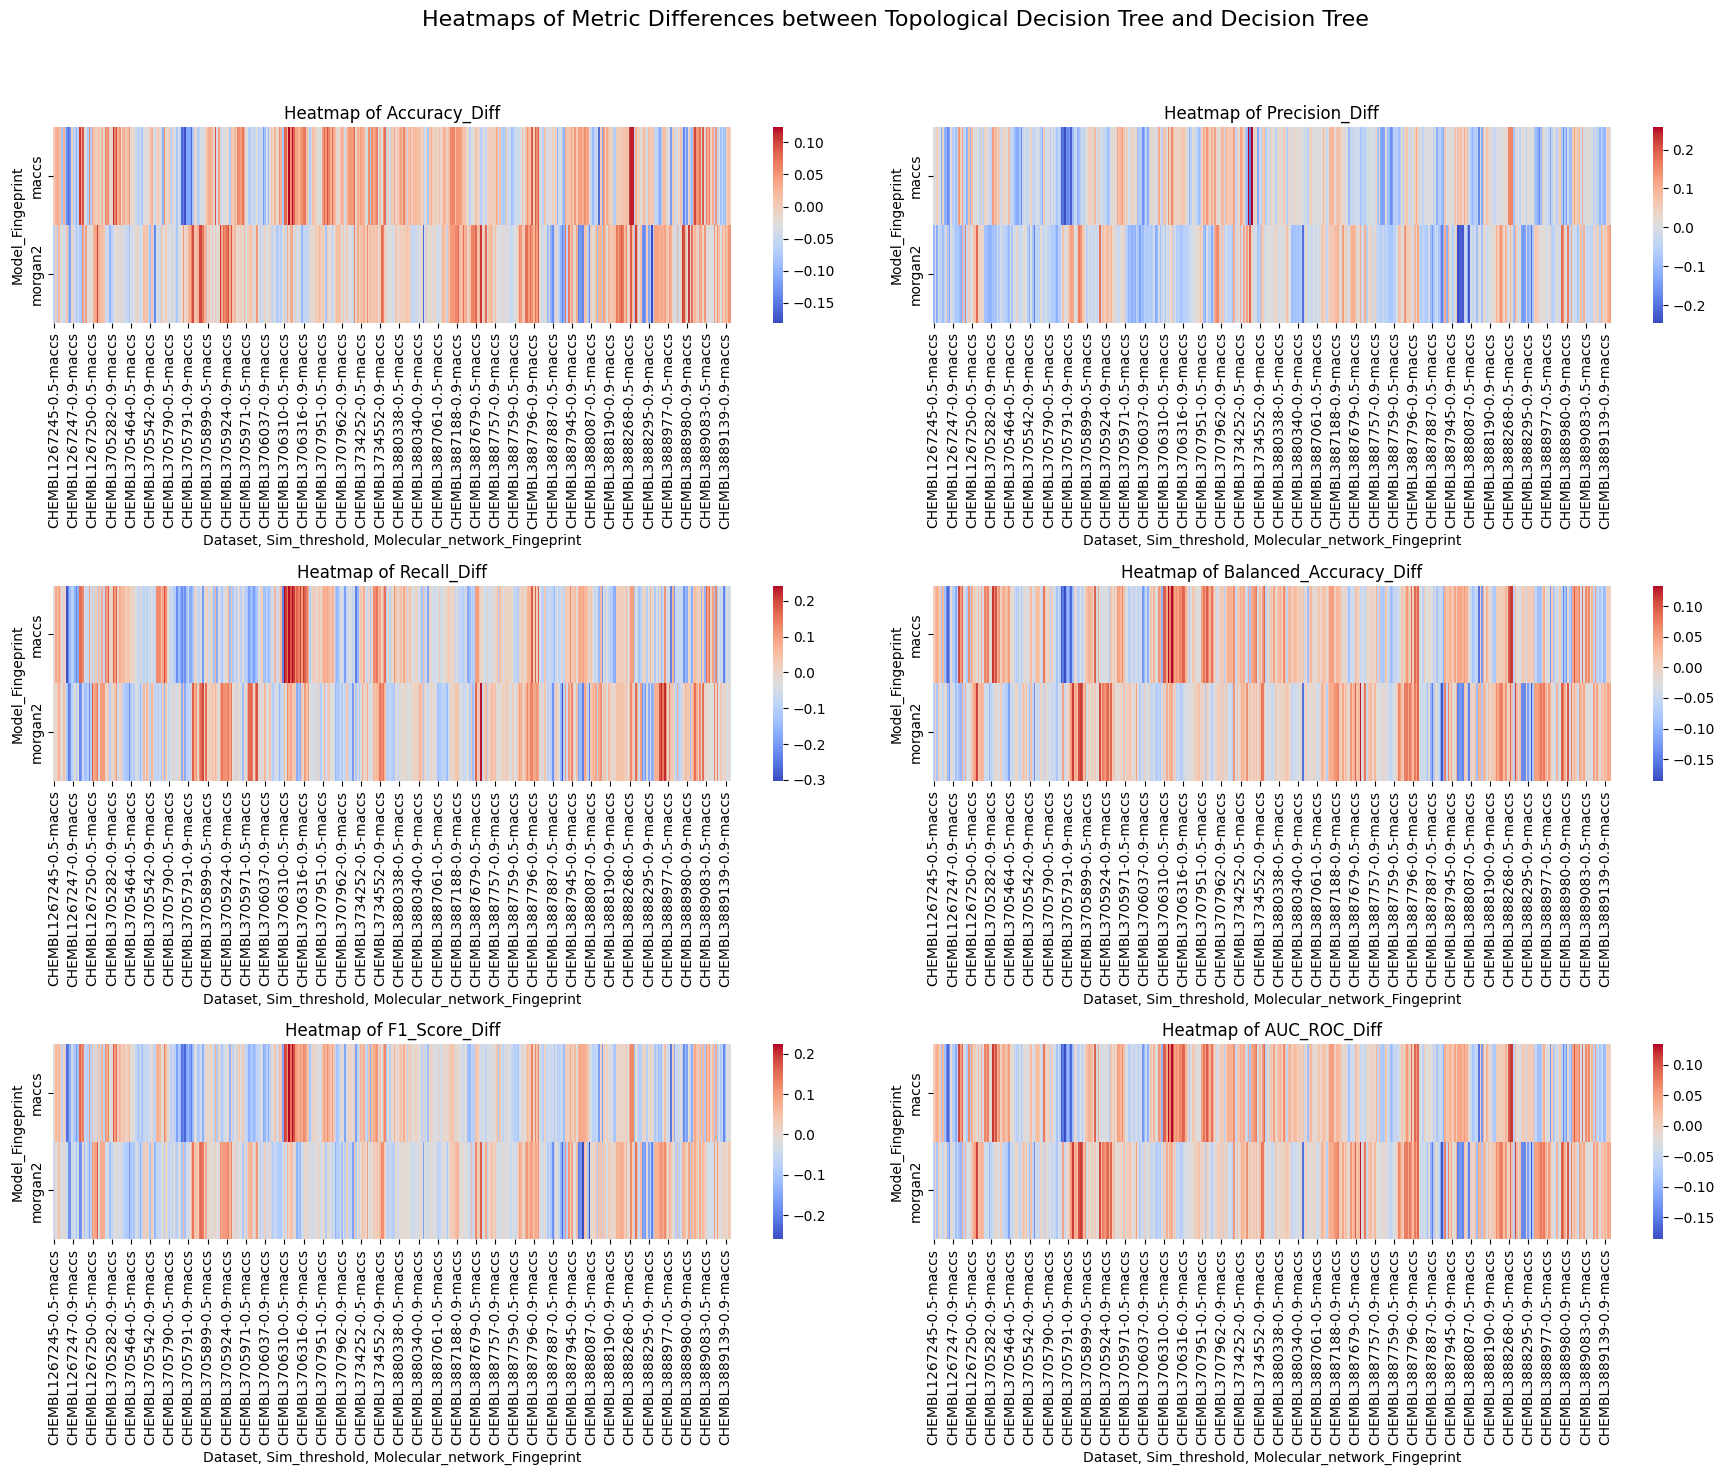

In [6]:
# Calculate differences in metrics
df['Accuracy_Diff'] = df['Topological_Decision_Tree_Accuracy'] - df['Decision_Tree_Accuracy']
df['Precision_Diff'] = df['Topological_Decision_Tree_Precision'] - df['Decision_Tree_Precision']
df['Recall_Diff'] = df['Topological_Decision_Tree_Recall'] - df['Decision_Tree_Recall']
df['Balanced_Accuracy_Diff'] = df['Topological_Decision_Tree_Balanced_Accuracy'] - df['Decision_Tree_Balanced_Accuracy']
df['F1_Score_Diff'] = df['Topological_Decision_Tree_F1_Score'] - df['Decision_Tree_F1_Score']
df['AUC_ROC_Diff'] = df['Topological_Decision_Tree_AUC_ROC'] - df['Decision_Tree_AUC_ROC']

# List of metric differences to plot
metrics = ['Accuracy_Diff', 'Precision_Diff', 'Recall_Diff', 'Balanced_Accuracy_Diff', 'F1_Score_Diff', 'AUC_ROC_Diff']

# Create a single figure with multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
fig.suptitle('Heatmaps of Metric Differences between Topological Decision Tree and Decision Tree', fontsize=16)

# Group the data by the relevant columns and calculate mean differences
grouped = df.groupby(['Dataset', 'Sim_threshold', 'Molecular_network_Fingeprint', 'Model_Fingeprint']).mean().reset_index()

# Iterate over metrics and axes
for i, metric in enumerate(metrics):
    # Determine row and column index
    row = i // 2
    col = i % 2
    
    # Create a pivot table for the heatmap
    pivot_table = grouped.pivot_table(index='Model_Fingeprint', columns=['Dataset', 'Sim_threshold', 'Molecular_network_Fingeprint'], values=metric)
    
    # Plot the heatmap on the corresponding subplot
    sns.heatmap(pivot_table, annot=False, cmap='coolwarm', ax=axes[row, col])
    axes[row, col].set_title(f'Heatmap of {metric}')
    axes[row, col].set_xlabel('Dataset, Sim_threshold, Molecular_network_Fingeprint')
    axes[row, col].set_ylabel('Model_Fingeprint')

# Adjust layout for better viewing
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [16]:
data = df[["Topological_Decision_Tree_Accuracy", "Decision_Tree_Accuracy", "Topological_Decision_Tree_Balanced_Accuracy", "Decision_Tree_Balanced_Accuracy", "Topological_Decision_Tree_Precision", "Decision_Tree_Precision", "Topological_Decision_Tree_Recall", "Decision_Tree_Recall", "Topological_Decision_Tree_F1_Score", "Decision_Tree_F1_Score"]].describe()[1:]

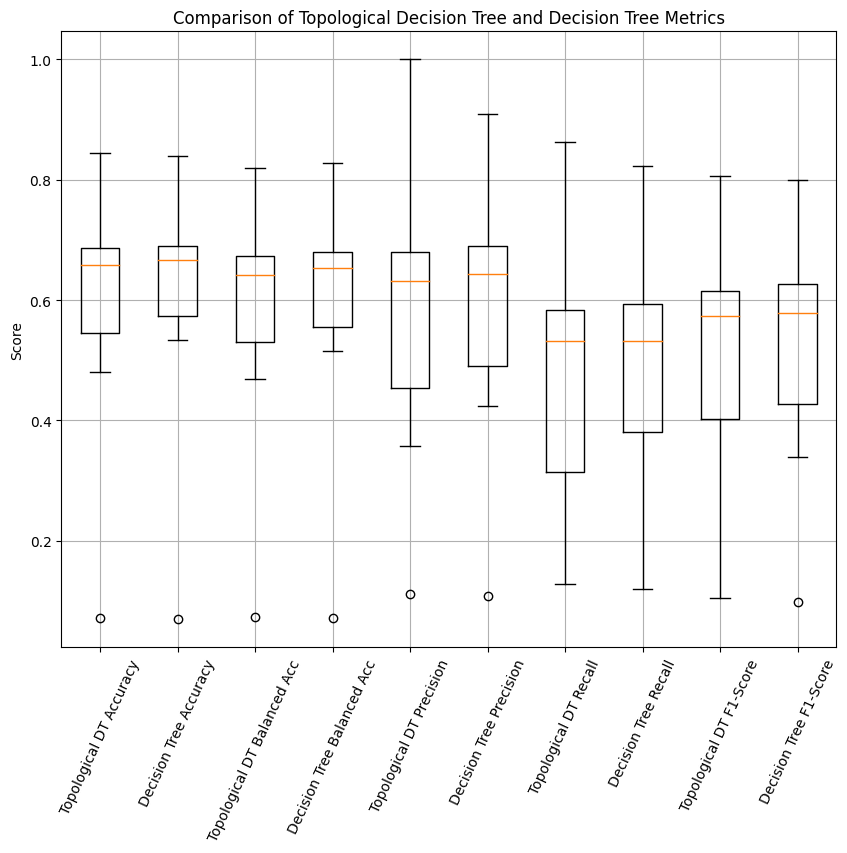

In [20]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot boxplots for the metrics
ax.boxplot([
    data["Topological_Decision_Tree_Accuracy"],
    data["Decision_Tree_Accuracy"],
    data["Topological_Decision_Tree_Balanced_Accuracy"],
    data["Decision_Tree_Balanced_Accuracy"],
    data["Topological_Decision_Tree_Precision"],
    data["Decision_Tree_Precision"],
    data["Topological_Decision_Tree_Recall"],
    data["Decision_Tree_Recall"],
    data["Topological_Decision_Tree_F1_Score"],
    data["Decision_Tree_F1_Score"]
], labels=[
    "Topological DT Accuracy", "Decision Tree Accuracy",
    "Topological DT Balanced Acc", "Decision Tree Balanced Acc",
    "Topological DT Precision", "Decision Tree Precision",
    "Topological DT Recall", "Decision Tree Recall",
    "Topological DT F1-Score", "Decision Tree F1-Score"
])

# Customize plot
ax.set_title("Comparison of Topological Decision Tree and Decision Tree Metrics")
ax.set_ylabel("Score")
ax.grid(True)
plt.xticks(rotation=65)  # Rotate x-axis labels for readability

# Show the plot
plt.show()

# Visualising Topological impurity reduction in practice

In [22]:
import os
from joblib import load
os.chdir('../benchmark')

In [23]:
clf = load("./clf.joblib")

In [24]:
clf

{'split_feature': 277,
 'split_value': 0,
 'left': {'split_feature': 1295,
  'split_value': 0,
  'left': {'split_feature': 327,
   'split_value': 0,
   'left': {'split_feature': 295,
    'split_value': 0,
    'left': {'split_feature': 79,
     'split_value': 0,
     'left': {'split_feature': 314,
      'split_value': 0,
      'left': {'split_feature': 80,
       'split_value': 0,
       'left': {'leaf': True,
        'class': 0,
        'topological_impurity': 0.0,
        'P_active': 0.0},
       'right': {'leaf': True,
        'class': 1,
        'topological_impurity': 0.0,
        'P_active': 1.0},
       'topological_impurity': 0.1875,
       'P_active': 0.75},
      'right': {'split_feature': 752,
       'split_value': 0,
       'left': {'split_feature': 33,
        'split_value': 0,
        'left': {'split_feature': 241,
         'split_value': 0,
         'left': {'split_feature': 204,
          'split_value': 0,
          'left': {'leaf': True,
           'class': 0,
         

# Draw the Decision Tree as Image

In [25]:
import pydot

def plot_binary_decision_tree(tree_dict):
    def add_node_and_edges(graph, node, node_id):
        # Create the current node in the graph
        if 'leaf' in node:
            # Leaf node
            label = f"class: {node['class']}\nimpurity: {node['topological_impurity']:.2f}\nP_active: {node['P_active']}"
            graph.add_node(pydot.Node(node_id, label=label, shape='ellipse', style='filled', fillcolor='lightblue'))
        else:
            # Decision node
            label = f"split_feature: {node['split_feature']}\nsplit_value: {node['split_value']}\nP_active: {node['P_active']}\nimpurity: {node['topological_impurity']:.2f}"
            graph.add_node(pydot.Node(node_id, label=label, shape='box'))

            # Recur on left and right children
            left_node_id = f"{node_id}_left"
            right_node_id = f"{node_id}_right"
            
            # Add left and right child nodes
            add_node_and_edges(graph, node['left'], left_node_id)
            add_node_and_edges(graph, node['right'], right_node_id)
            
            # Add edges from current node to left and right children
            graph.add_edge(pydot.Edge(node_id, left_node_id, label='left'))
            graph.add_edge(pydot.Edge(node_id, right_node_id, label='right'))
    
    # Create a graph
    graph = pydot.Dot(graph_type='digraph')

    # Start adding nodes and edges from the root
    add_node_and_edges(graph, tree_dict, "root")
    
    # Display the graph
    graph.write_png('binary_decision_tree.png')
    print("Decision tree plotted and saved as 'binary_decision_tree.png'.")

# Plot the binary decision tree
plot_binary_decision_tree(clf)

Decision tree plotted and saved as 'binary_decision_tree.png'.
